<a href="https://colab.research.google.com/github/2303A51553/Natural-language-process/blob/main/2303A51553_b09_nlp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/bbc_news.csv')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [ ]:
text=df['description']
print("description:\n",text)

description:
 0        The Ukrainian president says the country will ...
1        Jeremy Bowen was on the frontline in Irpin, as...
2        One of the world's biggest fertiliser firms sa...
3        The parents of the Manchester Arena bombing's ...
4        Consumers are feeling the impact of higher ene...
                               ...                        
42110    Watch highlights as Wales win 2-1 in Dublin fo...
42111    More than two tonnes of the Class A drug was s...
42112    Finance Secretary Shona Robison is preparing t...
42113    Wales defeated the Republic of Ireland 2-1 mak...
42114    Three children have not been back to the Belfa...
Name: description, Length: 42115, dtype: object


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string

In [ ]:
#lowercasing
import re
def preprocess_text(text):
  text=text.lower()
  #remove punctuation
  text=text.translate(str.maketrans('','',string.punctuation))
  text=re.sub(r'[^a-zA-Z0-9\s]',"",text)
  tokens=word_tokenize(text)
  #remove stopwords
  stop_words=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stop_words]
  #remove punctuation
  return " ".join(tokens)
  #Apply preprocessing
df["cleaned_text"]=df['description'].astype(str).apply(preprocess_text)
print(df["cleaned_text"])

0        ukrainian president says country forgive forge...
1        jeremy bowen frontline irpin residents came ru...
2        one worlds biggest fertiliser firms says confl...
3        parents manchester arena bombings youngest vic...
4        consumers feeling impact higher energy costs f...
                               ...                        
42110    watch highlights wales win 21 dublin 32 aggreg...
42111    two tonnes class drug seized shipment colombia...
42112    finance secretary shona robison preparing set ...
42113    wales defeated republic ireland 21 making foot...
42114    three children back belfast model school girls...
Name: cleaned_text, Length: 42115, dtype: object


In [ ]:
print(df)

                                                   title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
42110           Highlights: Wales make history in Dublin   
42111  Gang jailed over £200m of cocaine in banana boxes   
42112   Scottish Budget presents huge challenges for SNP   
42113  Celebrations as Wales make history qualifying ...   
42114  School tells Muslim girls it’s ‘not safe’ for ...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...                              ...   

In [ ]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df["cleaned_text"])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 457291 stored elements and shape (42115, 35811)>
  Coords	Values
  (0, 33308)	1
  (0, 25306)	1
  (0, 28320)	1
  (0, 8445)	1
  (0, 13304)	1
  (0, 13302)	1
  (0, 21941)	1
  (0, 7226)	1
  (1, 17503)	1
  (1, 5423)	1
  (1, 13599)	1
  (1, 17141)	1
  (1, 27089)	1
  (1, 6210)	1
  (1, 27920)	1
  (1, 12879)	1
  (1, 33019)	1
  (1, 13068)	1
  (2, 28320)	1
  (2, 23203)	1
  (2, 35332)	1
  (2, 4827)	1
  (2, 12685)	1
  (2, 12905)	1
  (2, 7945)	1
  :	:
  (42112, 25276)	1
  (42112, 12827)	1
  (42112, 27560)	1
  (42113, 12906)	1
  (42113, 34506)	1
  (42113, 20056)	1
  (42113, 32672)	1
  (42113, 17120)	1
  (42113, 694)	1
  (42113, 15789)	1
  (42113, 20039)	1
  (42113, 27019)	1
  (42113, 9358)	1
  (42113, 13243)	1
  (42114, 29544)	1
  (42114, 7045)	1
  (42114, 4593)	1
  (42114, 3980)	1
  (42114, 32240)	1
  (42114, 3602)	1
  (42114, 28428)	1
  (42114, 14183)	1
  (42114, 2659)	1
  (42114, 21456)	1
  (42114, 22825)	1


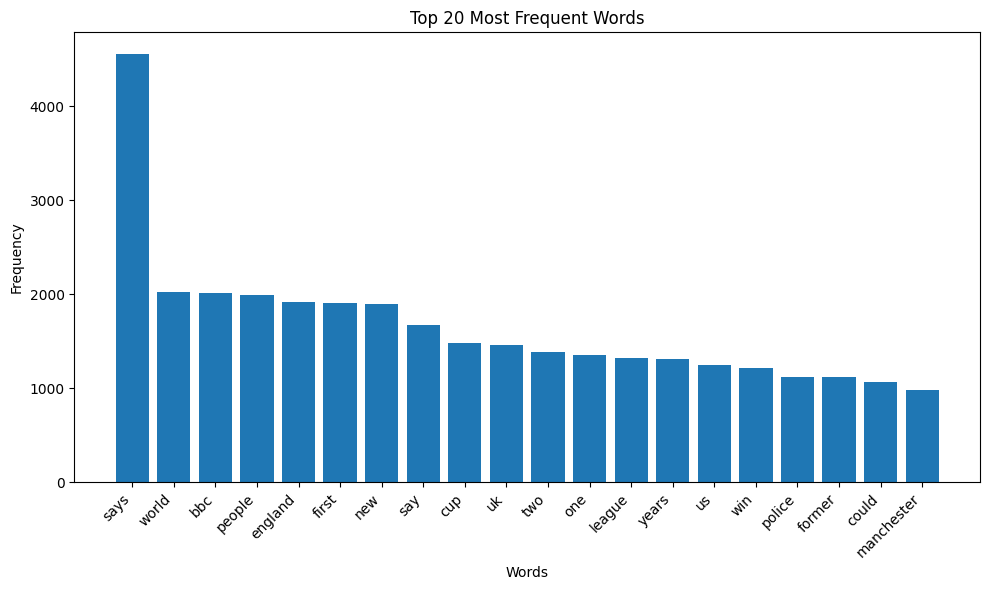

In [33]:
import matplotlib.pyplot as plt

# Get the sum of occurrences for each word across all documents
word_counts = X.sum(axis=0)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Create a dictionary of words and their counts
word_freq = dict(zip(words, word_counts.flat))

# Sort the words by frequency and get the top 20
most_common_words=sorted(word_freq.items(),key=lambda item:item[1],reverse=True)[:20]

# Separate words and counts for plotting
common_words=[word for word,count in most_common_words]
counts=[count for word,count in most_common_words]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()